** Step -1: Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Step -2 : Load Dataset **

In [2]:
dataset = pd.read_csv('iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**Step -3: Data Preprocessing**

| Types                 |     Remedy                   |
|----------------------:|:----------------------------:|
|Idenfity Missing values| Remove the missing or replace|
|Categorial Data        |  Convert it into numbers     |

** If you find cateogrial data remove or replace it with central tendency **

dataset.dropna(axis = 0)

dataset.fillna(fill = dataset[''].mean()

** Convert dataframe into array**

In [4]:
X = dataset.iloc[:,[0,2]].values # independent variable
y = dataset.iloc[:,-1].values # dependent variable

**Categorial Data**

In [5]:
from sklearn.preprocessing import LabelEncoder
# Warning Don't apply this to independent variables
# if you want to apply also use OneHotEncoding -> it will create dummies
# In dependent variable we should not create dummies (Machine Learning)

In [6]:
label = LabelEncoder()

about LabelEncode

- fit -> check for categorical data
- transform -> replace the categorical data with values (numerics)

In [7]:
y = label.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

**Step - 4: Visualize  data if possible (if possible)**

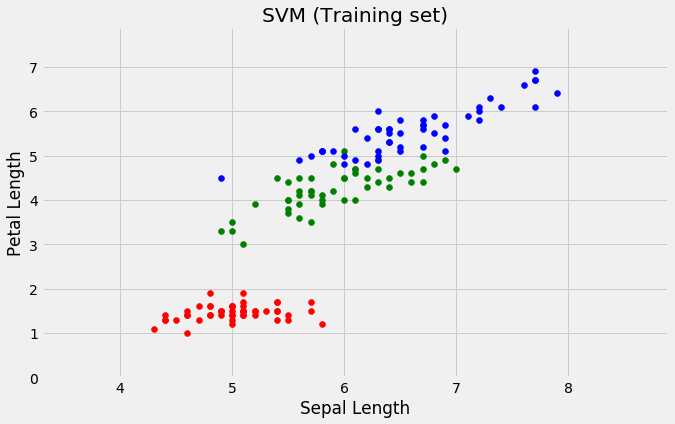

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))

X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i in range(len(y_set)):
    if y_set[i] == 0:
        c = 'red'
    elif y_set[i] == 1:
        c = 'green'
        
    else:
        c = 'blue'
        
    plt.scatter(X_set[i,0], X_set[i,1],color = c)
    

plt.title('SVM (Training set)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
#plt.legend()
plt.show()

** Step -3: Standard Scaling **

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
X_new = sc.fit_transform(X)
X_new

array([[-0.90068117, -1.3412724 ],
       [-1.14301691, -1.3412724 ],
       [-1.38535265, -1.39813811],
       [-1.50652052, -1.2844067 ],
       [-1.02184904, -1.3412724 ],
       [-0.53717756, -1.17067529],
       [-1.50652052, -1.3412724 ],
       [-1.02184904, -1.2844067 ],
       [-1.74885626, -1.3412724 ],
       [-1.14301691, -1.2844067 ],
       [-0.53717756, -1.2844067 ],
       [-1.26418478, -1.227541  ],
       [-1.26418478, -1.3412724 ],
       [-1.87002413, -1.51186952],
       [-0.05250608, -1.45500381],
       [-0.17367395, -1.2844067 ],
       [-0.53717756, -1.39813811],
       [-0.90068117, -1.3412724 ],
       [-0.17367395, -1.17067529],
       [-0.90068117, -1.2844067 ],
       [-0.53717756, -1.17067529],
       [-0.90068117, -1.2844067 ],
       [-1.50652052, -1.56873522],
       [-0.90068117, -1.17067529],
       [-1.26418478, -1.05694388],
       [-1.02184904, -1.227541  ],
       [-1.02184904, -1.227541  ],
       [-0.7795133 , -1.2844067 ],
       [-0.7795133 ,

**Step - 5 : Splitting data into testing and training**

In [11]:
from sklearn.cross_validation import train_test_split

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.10,
                                                   random_state = 0)

In [13]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((135, 2), (15, 2), (135,), (15,))

**Step -6 : Bulding a Machine Learning Classifier**

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
model = DecisionTreeClassifier()

In [16]:
model.fit(x_train, y_train) # traning model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Step-7: Evaluation ** 

In [17]:
y_pred = model.predict(x_test) # for evalutating model
y_prob = model.predict_proba(x_test) # probabiltiy score

**Classification Report**

In [18]:
from sklearn.metrics import confusion_matrix , classification_report

In [19]:
cm = confusion_matrix(y_test, y_pred) # confusion matrix 
cr = classification_report(y_test, y_pred) # classification report 

In [20]:
import seaborn as sns

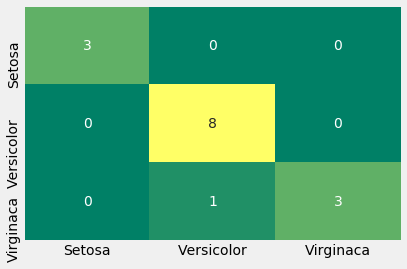

In [21]:
sns.heatmap(cm ,annot=True, cbar=False,
            xticklabels=['Setosa','Versicolor','Virginaca'],
           yticklabels=['Setosa','Versicolor','Virginaca'], cmap = 'summer')
plt.show()

In [22]:
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       0.89      1.00      0.94         8
          2       1.00      0.75      0.86         4

avg / total       0.94      0.93      0.93        15



In [23]:
from matplotlib.colors import ListedColormap

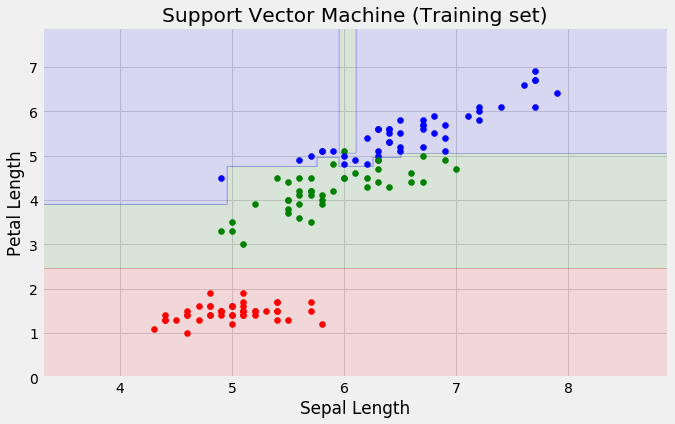

In [24]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.1, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i in range(len(y_set)):
    if y_set[i] == 0:
        c = 'red'
    elif y_set[i] == 1:
        c = 'green'
        
    else:
        c = 'blue'
        
    plt.scatter(X_set[i,0], X_set[i,1],color = c)
    

plt.title('Support Vector Machine (Training set)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
#plt.legend()
plt.show()